In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def getDf():
    files = {}
    for size in [3000000,13000000, 23000000, 33000000]:
        for b in ["true", "false"]:
            with open("../result/resultRustOwnerType_init_{}_{}.txt".format(b, size), "r") as f:
                files["size_{}_init_{}".format(size, b)] = [s.strip().split("#") for s in f.readlines()]

    dfs = {}
    header = None
    for k in files.keys():
        df = pd.DataFrame(files[k])
        header = df.iloc[0]
        df = df[1:]
        df.columns = header
        dfs[k] = df

    data = pd.DataFrame(columns=header)
    for s in [3000000,13000000, 23000000, 33000000]:
        for b in ["true", "false"]:
            data = pd.concat([data, dfs["size_{}_init_{}".format(s, b)]])
            data = data.astype({"datastructure": str, "init": str ,"size": int, "field": str, "createtime":int,  \
                        'accesstime': int,"totaltime": int})
    return data

In [11]:
df = getDf()

In [12]:
df

,datastructure,init,size,field,createtime,accesstime,totaltime
1,[RustVector],true,3000000,"""own""",679,16220,20372
2,[RustVector],true,3000000,"""own""",666,16059,20228
3,[RustVector],true,3000000,"""own""",637,17269,21403
4,[RustVector],true,3000000,"""own""",653,16159,20423
5,[RustVector],true,3000000,"""own""",657,16189,20330
...,...,...,...,...,...,...,...
11,[RustVector],false,33000000,"""slice""",5181,179443,228780
12,[RustVector],false,33000000,"""slice""",5475,183759,234329
13,[RustVector],false,33000000,"""slice""",4877,177954,227413
14,[RustVector],false,33000000,"""slice""",5243,178809,229376


In [13]:
df_avg = df.groupby(["size", "init"]).mean().reset_index()

In [14]:
df_avg

,size,init,createtime,accesstime,totaltime
0,3000000,false,422.600000,16522.133333,20456.266667
1,3000000,true,405.666667,16410.400000,20327.266667
2,13000000,false,2099.333333,71592.866667,90376.666667
3,13000000,true,1948.133333,71914.533333,90586.333333
4,23000000,false,3882.133333,125999.800000,160209.066667
5,23000000,true,4026.266667,127258.000000,161414.266667
6,33000000,false,6734.066667,181708.000000,232893.666667
7,33000000,true,6145.200000,181873.333333,232233.933333


In [15]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, round(height, 3)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 12)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


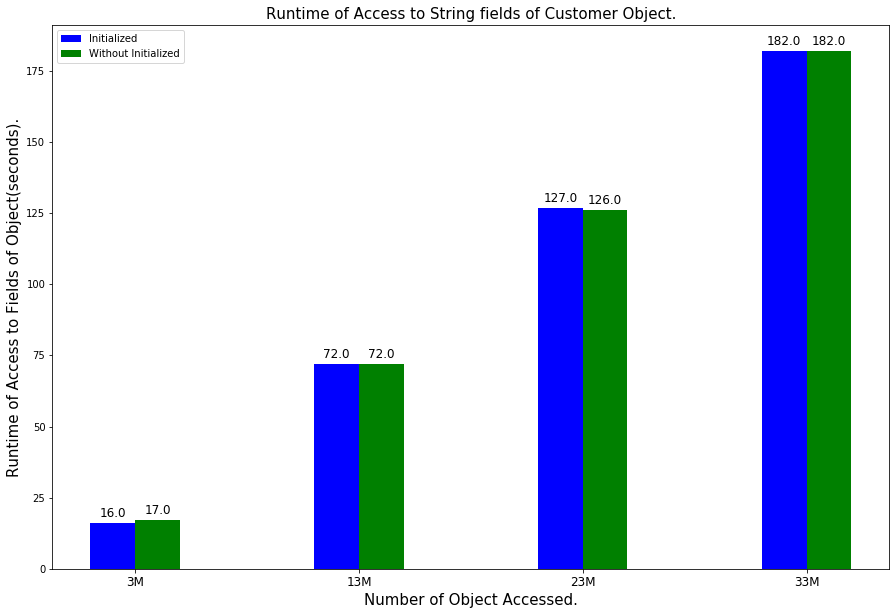

In [19]:
init = df_avg[df_avg["init"] == 'true']
without_init = df_avg[df_avg["init"] == 'false']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['size'].nunique())
b1 = ax.bar(idx - w/2, round(init["accesstime"] / 1000, 0), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w/2, round(without_init["accesstime"] / 1000, 0), width = w, color ='g', align = 'center')
label = np.sort(df_avg['size'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "M" for n in (label / 1000000)], fontsize = 12)
ax.set_xlabel("Number of Object Accessed.", fontsize = 15)
ax.set_ylabel("Runtime of Access to Fields of Object(seconds).", fontsize = 15)
ax.set_title("Runtime of Access to String fields of Customer Object.", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Initialized", "Without Initialized"))
#ax.set_yscale('log')
fig.savefig("rust_access_init_vs_noint.eps")
#fig.savefig("rust_borrowing.png")
plt.show()

In [9]:
init_v = init["accesstime"].values
noinit_v = without_init["accesstime"].values

In [10]:
((noinit_v - init_v) / noinit_v) * 100

array([ -2.4345452 , -10.13097326,  28.33504408,  52.81149514,
        61.98080696,  60.76868304])